In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


In [2]:
# ========================
# 1. Crear entorno
# ========================
env = gym.make("Blackjack-v1", sab=True)  # sab=True usa la versión que mantiene la misma distribución de recompensas



In [3]:

# ========================
# 2. Funciones auxiliares
# ========================

def epsilon_greedy_policy(Q, state, nA, epsilon):
    """Devuelve una acción usando política epsilon-greedy."""
    if np.random.rand() < epsilon:
        return np.random.randint(nA)  # Explorar
    else:
        return np.argmax(Q[state])    # Explotar


In [4]:
def evaluar_politica(env, policy, num_episodes=100000):
    total_reward = 0
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        while not done:
            action = policy.get(state, 0)  # acción por defecto = pedir
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
        total_reward += reward
    return total_reward / num_episodes



In [5]:
def mc_control_con_tracking(env, num_episodes, gamma=1.0, epsilon=0.1, eval_interval=50000):
    # Inicializar Q(s,a) como un diccionario de valores por defecto 0
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Suma y conteo para promedio incremental
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)

    performance = []  # Para guardar el rendimiento en intervalos

    for episode in range(1, num_episodes + 1):
        # Generar episodio
        episode_data = []
        state, _ = env.reset()
        done = False
        
        while not done:
            action = epsilon_greedy_policy(Q, state, env.action_space.n, epsilon)
            next_state, reward, terminated, truncated, _ = env.step(action)
            episode_data.append((state, action, reward))
            state = next_state
            done = terminated or truncated

        # Actualización MC
        G = 0
        visited = set()
        for state, action, reward in reversed(episode_data):
            G = gamma * G + reward
            if (state, action) not in visited:
                returns_sum[(state, action)] += G
                returns_count[(state, action)] += 1.0
                Q[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]
                visited.add((state, action))

        # Evaluar cada cierto número de episodios
        if episode % eval_interval == 0:
            temp_policy = {s: np.argmax(a) for s, a in Q.items()}
            avg_r = evaluar_politica(env, temp_policy, num_episodes=10000)
            performance.append((episode, avg_r))
            print(f"Episodio {episode} -> Rendimiento: {avg_r:.3f}")

    return Q, performance


In [6]:
def mc_control_con_tracking(env, num_episodes, gamma=1.0, epsilon=0.1, eval_interval=50000):
    # Inicializar Q(s,a) como un diccionario de valores por defecto 0
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Suma y conteo para promedio incremental
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)

    performance = []  # Para guardar el rendimiento en intervalos

    for episode in range(1, num_episodes + 1):
        # Generar episodio
        episode_data = []
        state, _ = env.reset()
        done = False
        
        while not done:
            action = epsilon_greedy_policy(Q, state, env.action_space.n, epsilon)
            next_state, reward, terminated, truncated, _ = env.step(action)
            episode_data.append((state, action, reward))
            state = next_state
            done = terminated or truncated

        # Actualización MC
        G = 0
        visited = set()
        for state, action, reward in reversed(episode_data):
            G = gamma * G + reward
            if (state, action) not in visited:
                returns_sum[(state, action)] += G
                returns_count[(state, action)] += 1.0
                Q[state][action] = returns_sum[(state, action)] / returns_count[(state, action)]
                visited.add((state, action))

        # Evaluar cada cierto número de episodios
        if episode % eval_interval == 0:
            temp_policy = {s: np.argmax(a) for s, a in Q.items()}
            avg_r = evaluar_politica(env, temp_policy, num_episodes=10000)
            performance.append((episode, avg_r))
            print(f"Episodio {episode} -> Rendimiento: {avg_r:.3f}")

    return Q, performance


In [7]:
Q, performance = mc_control_con_tracking(env, num_episodes=1_000_000, eval_interval=5000)
policy = {state: np.argmax(actions) for state, actions in Q.items()}


Episodio 5000 -> Rendimiento: -0.095
Episodio 10000 -> Rendimiento: -0.118
Episodio 15000 -> Rendimiento: -0.099
Episodio 20000 -> Rendimiento: -0.090
Episodio 25000 -> Rendimiento: -0.087
Episodio 30000 -> Rendimiento: -0.098
Episodio 35000 -> Rendimiento: -0.078
Episodio 40000 -> Rendimiento: -0.086
Episodio 45000 -> Rendimiento: -0.059
Episodio 50000 -> Rendimiento: -0.071
Episodio 55000 -> Rendimiento: -0.073
Episodio 60000 -> Rendimiento: -0.075
Episodio 65000 -> Rendimiento: -0.064
Episodio 70000 -> Rendimiento: -0.057
Episodio 75000 -> Rendimiento: -0.062
Episodio 80000 -> Rendimiento: -0.061
Episodio 85000 -> Rendimiento: -0.062
Episodio 90000 -> Rendimiento: -0.066
Episodio 95000 -> Rendimiento: -0.063
Episodio 100000 -> Rendimiento: -0.058
Episodio 105000 -> Rendimiento: -0.056
Episodio 110000 -> Rendimiento: -0.056
Episodio 115000 -> Rendimiento: -0.054
Episodio 120000 -> Rendimiento: -0.061
Episodio 125000 -> Rendimiento: -0.059
Episodio 130000 -> Rendimiento: -0.054
Episod

Rendimiento promedio de la política final: -0.046


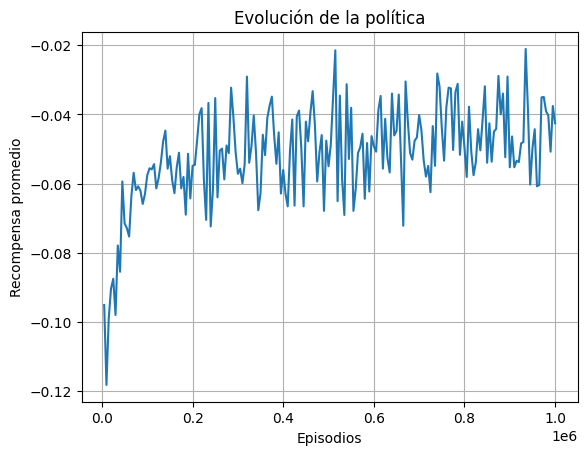

In [8]:
avg_reward = evaluar_politica(env, policy)
print(f"Rendimiento promedio de la política final: {avg_reward:.3f}")


# Graficar evolución del rendimiento
episodes, rewards = zip(*performance)
plt.plot(episodes, rewards)
plt.xlabel("Episodios")
plt.ylabel("Recompensa promedio")
plt.title("Evolución de la política")
plt.grid(True)
plt.show()


In [9]:
policy

{(16, 6, 0): np.int64(0),
 (18, 3, 0): np.int64(0),
 (12, 10, 0): np.int64(1),
 (16, 7, 0): np.int64(1),
 (14, 10, 0): np.int64(1),
 (20, 3, 0): np.int64(0),
 (16, 10, 0): np.int64(0),
 (20, 10, 1): np.int64(0),
 (14, 8, 0): np.int64(1),
 (14, 5, 1): np.int64(1),
 (14, 6, 0): np.int64(0),
 (20, 8, 0): np.int64(0),
 (11, 9, 0): np.int64(1),
 (5, 10, 0): np.int64(1),
 (14, 9, 0): np.int64(1),
 (5, 2, 0): np.int64(1),
 (15, 6, 0): np.int64(0),
 (20, 10, 0): np.int64(0),
 (17, 10, 0): np.int64(0),
 (15, 1, 1): np.int64(1),
 (19, 4, 0): np.int64(0),
 (19, 3, 0): np.int64(0),
 (13, 3, 0): np.int64(0),
 (17, 4, 0): np.int64(0),
 (16, 4, 0): np.int64(0),
 (13, 7, 0): np.int64(1),
 (20, 9, 0): np.int64(0),
 (13, 9, 0): np.int64(1),
 (17, 5, 0): np.int64(0),
 (13, 10, 0): np.int64(1),
 (10, 10, 0): np.int64(1),
 (18, 10, 0): np.int64(0),
 (15, 10, 1): np.int64(1),
 (15, 10, 0): np.int64(1),
 (12, 9, 0): np.int64(1),
 (6, 1, 0): np.int64(1),
 (11, 10, 0): np.int64(1),
 (11, 1, 0): np.int64(1),
 (

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def configure_matplotlib():
    """Configurar matplotlib con estilo personalizado"""
    plt.rcParams.update({
        'figure.facecolor': 'white',
        'axes.facecolor': '#f8f9fa',
        'axes.edgecolor': '#333333',
        'axes.linewidth': 1.2,
        'axes.grid': True,
        'grid.alpha': 0.3,
        'grid.linewidth': 0.8,
        'font.size': 11,
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'figure.titlesize': 16
    })

def plot_policy_and_value(Q, policy, usable_ace=True, figsize=(15, 6)):
    """
    Visualiza la política óptima y función de valor para blackjack
    
    Parameters:
    -----------
    Q : dict
        Función Q(s,a) con valores de estado-acción
    policy : dict  
        Política óptima π(s) -> acción
    usable_ace : bool
        True si hay As usable (valor 11), False en otro caso
    figsize : tuple
        Tamaño de la figura
    """
    configure_matplotlib()
    
    player_sum = np.arange(4, 22)
    dealer_show = np.arange(1, 11)
    
    # Inicializar matrices
    policy_Z = np.zeros((len(player_sum), len(dealer_show)))
    value_Z = np.zeros((len(player_sum), len(dealer_show)))
    
    # Llenar matrices con datos
    for i, ps in enumerate(player_sum):
        for j, ds in enumerate(dealer_show):
            state = (ps, ds, usable_ace)
            if state in policy:
                policy_Z[i, j] = policy[state]
                if state in Q:
                    value_Z[i, j] = np.max(Q[state])
    
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(f'Jugador {"Con As" if usable_ace else "Sin As"}', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    # === GRÁFICO 1: POLÍTICA ===
    # Verde = Stick (0), Rojo = Hit (1)
    colors_policy = ['#27ae60', '#e74c3c']  
    cmap_policy = ListedColormap(colors_policy)
    
    im1 = axes[0].imshow(policy_Z, origin='lower', 
                         extent=[0.5, 10.5, 3.5, 21.5],
                         cmap=cmap_policy, vmin=0, vmax=1, aspect='auto')
    
    axes[0].set_title('Política Óptima\n(Verde=Plantarse, Rojo=Pedir)', 
                      fontweight='bold', pad=20)
    axes[0].set_xlabel('Carta Visible del Dealer', fontweight='bold')
    axes[0].set_ylabel('Suma del Jugador', fontweight='bold')
    
    axes[0].set_xticks(range(1, 11))
    axes[0].set_xticklabels(['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    axes[0].set_yticks(range(4, 22))
    
    # Cuadrícula
    for x in range(1, 11):
        axes[0].axvline(x + 0.5, color='white', linewidth=1, alpha=0.7)
    for y in range(4, 22):
        axes[0].axhline(y + 0.5, color='white', linewidth=1, alpha=0.7)
    
    # Texto H o S
    for i, ps in enumerate(player_sum):
        for j, ds in enumerate(dealer_show):
            action = 'S' if policy_Z[i, j] == 0 else 'H'
            axes[0].text(j + 1, ps, action, ha='center', va='center',
                        color='white', fontweight='bold', fontsize=10)
    
    cbar1 = fig.colorbar(im1, ax=axes[0], shrink=0.8)
    cbar1.set_ticks([0, 1])
    cbar1.set_ticklabels(['Plantarse', 'Pedir'])
    cbar1.ax.tick_params(labelsize=10)
    
    # === GRÁFICO 2: FUNCIÓN DE VALOR ===
    im2 = axes[1].imshow(value_Z, origin='lower', 
                         extent=[0.5, 10.5, 3.5, 21.5],
                         cmap='RdYlGn', aspect='auto')
    
    axes[1].set_title('Función de Valor V(s)\n(Valor Esperado)', 
                      fontweight='bold', pad=20)
    axes[1].set_xlabel('Carta Visible del Dealer', fontweight='bold')
    axes[1].set_ylabel('Suma del Jugador', fontweight='bold')
    
    axes[1].set_xticks(range(1, 11))
    axes[1].set_xticklabels(['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    axes[1].set_yticks(range(4, 22))
    
    for x in range(1, 11):
        axes[1].axvline(x + 0.5, color='white', linewidth=1, alpha=0.7)
    for y in range(4, 22):
        axes[1].axhline(y + 0.5, color='white', linewidth=1, alpha=0.7)
    
    for i, ps in enumerate(player_sum):
        for j, ds in enumerate(dealer_show):
            if value_Z[i, j] != 0:
                color = 'white' if value_Z[i, j] < 0 else 'black'
                axes[1].text(j + 1, ps, f'{value_Z[i, j]:.2f}', 
                            ha='center', va='center',
                            color=color, fontweight='bold', fontsize=8)
    
    cbar2 = fig.colorbar(im2, ax=axes[1], shrink=0.8)
    cbar2.set_label('Valor Esperado', rotation=270, labelpad=15, fontweight='bold')
    cbar2.ax.tick_params(labelsize=10)
    
    plt.tight_layout()
    plt.subplots_adjust()
    
    return fig, axes


def plot_combined_analysis(Q, policy, figsize=(18, 12)):
    """
    Crea una visualización completa comparando natural vs no-natural
    """
    configure_matplotlib()
    
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle('Análisis Completo de Estrategia de Blackjack', 
                 fontsize=18, fontweight='bold', y=0.95)
    
    for idx, natural in enumerate([True, False]):
        player_sum = np.arange(4, 22)
        dealer_show = np.arange(1, 11)
        
        policy_Z = np.zeros((len(player_sum), len(dealer_show)))
        value_Z = np.zeros((len(player_sum), len(dealer_show)))
        
        for i, ps in enumerate(player_sum):
            for j, ds in enumerate(dealer_show):
                state = (ps, ds, natural)
                if state in policy:
                    policy_Z[i, j] = policy[state]
                    if state in Q:
                        value_Z[i, j] = np.max(Q[state])
        
        # Política
        colors_policy = ['#27ae60', '#e74c3c']
        cmap_policy = ListedColormap(colors_policy)
        
        im1 = axes[idx, 0].imshow(policy_Z, origin='lower',
                                  extent=[0.5, 10.5, 3.5, 21.5],
                                  cmap=cmap_policy, vmin=0, vmax=1, aspect='auto')
        
        title_suffix = "Natural" if natural else "As Suave"
        axes[idx, 0].set_title(f'Política - {title_suffix}', fontweight='bold')
        axes[idx, 0].set_ylabel('Suma del Jugador', fontweight='bold')
        if idx == 1:
            axes[idx, 0].set_xlabel('Carta Visible del Dealer', fontweight='bold')
        
        axes[idx, 0].set_xticks(range(1, 11))
        axes[idx, 0].set_xticklabels(['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
        axes[idx, 0].set_yticks(range(4, 22))
        
        # Función de valor
        im2 = axes[idx, 1].imshow(value_Z, origin='lower',
                                  extent=[0.5, 10.5, 3.5, 21.5],
                                  cmap='RdYlGn', aspect='auto')
        
        axes[idx, 1].set_title(f'Valor Esperado - {title_suffix}', fontweight='bold')
        if idx == 1:
            axes[idx, 1].set_xlabel('Carta Visible del Dealer', fontweight='bold')
        
        axes[idx, 1].set_xticks(range(1, 11))
        axes[idx, 1].set_xticklabels(['A', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
        axes[idx, 1].set_yticks(range(4, 22))
        
        # Colorbars solo en la fila inferior
        if idx == 1:
            cbar1 = fig.colorbar(im1, ax=axes[idx, 0], shrink=0.8)
            cbar1.set_ticks([0, 1])
            cbar1.set_ticklabels(['Pedir', 'Plantarse'])
            
            cbar2 = fig.colorbar(im2, ax=axes[idx, 1], shrink=0.8)
            cbar2.set_label('Valor Esperado', rotation=270, labelpad=15)
    
    plt.tight_layout()
    plt.subplots_adjust()
    return fig, axes


Funciones de visualización creadas:
1. plot_policy_and_value() - Para visualizar individual
2. plot_combined_analysis() - Para comparación completa
3. configure_matplotlib() - Para configurar estilo


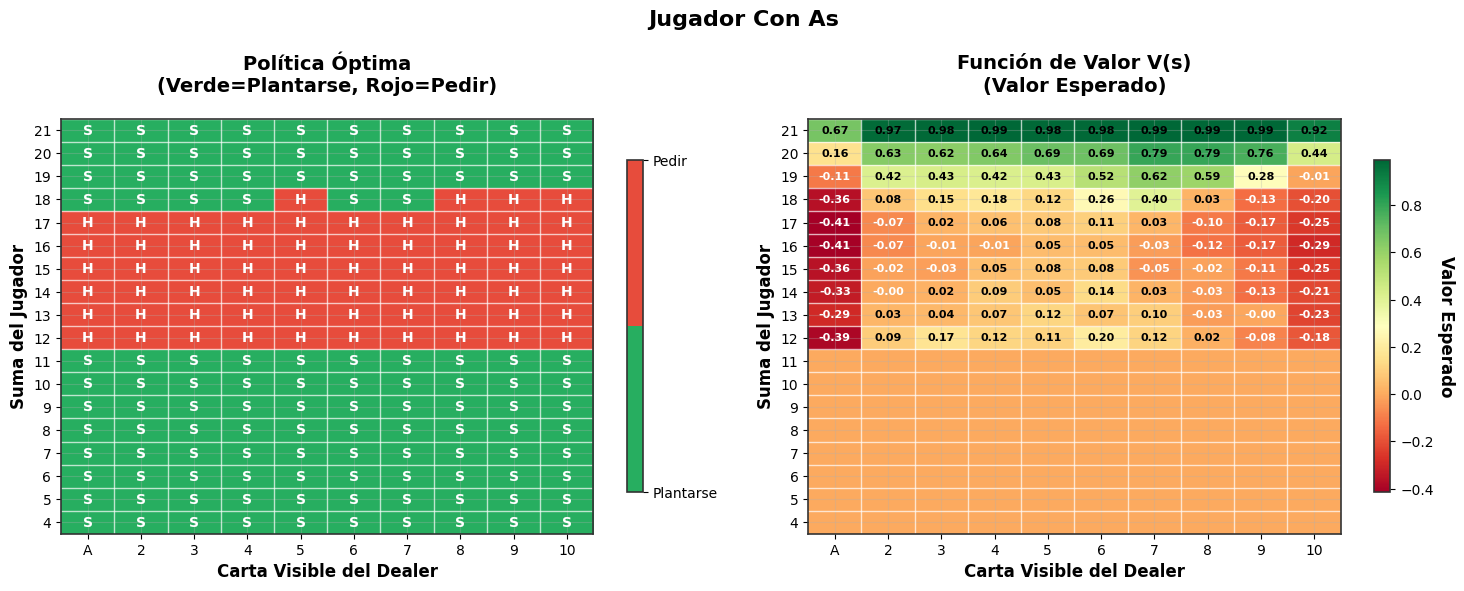

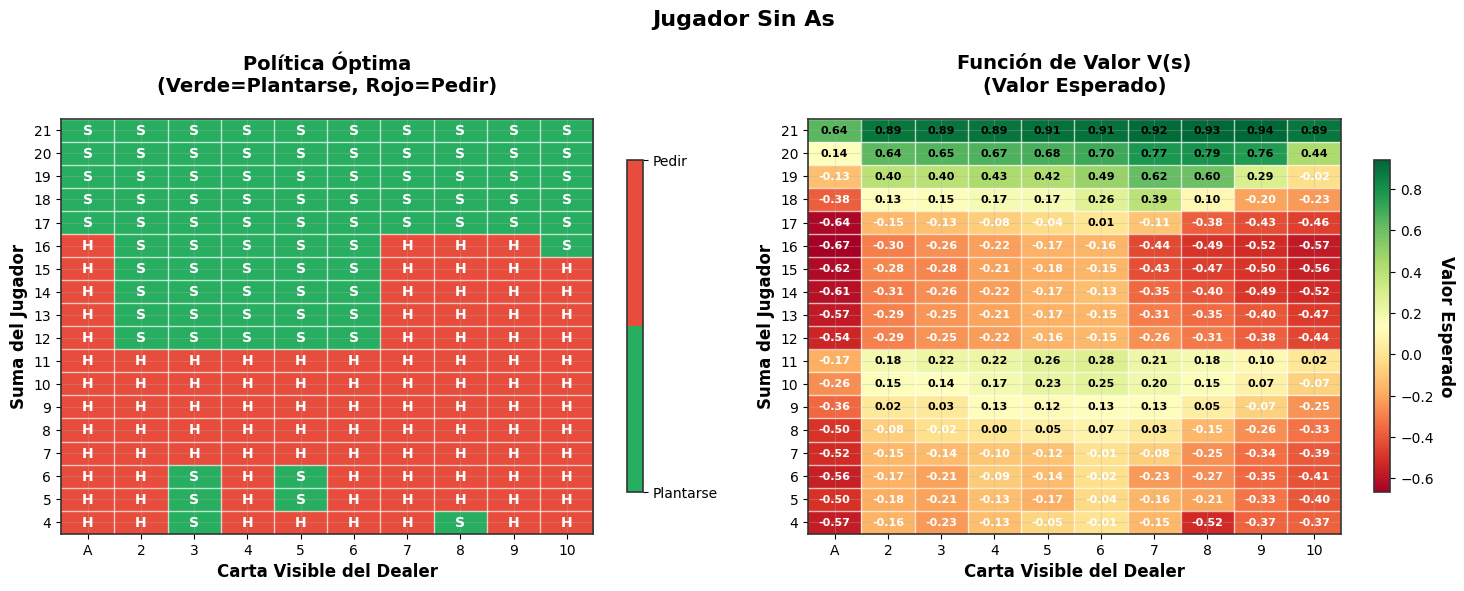

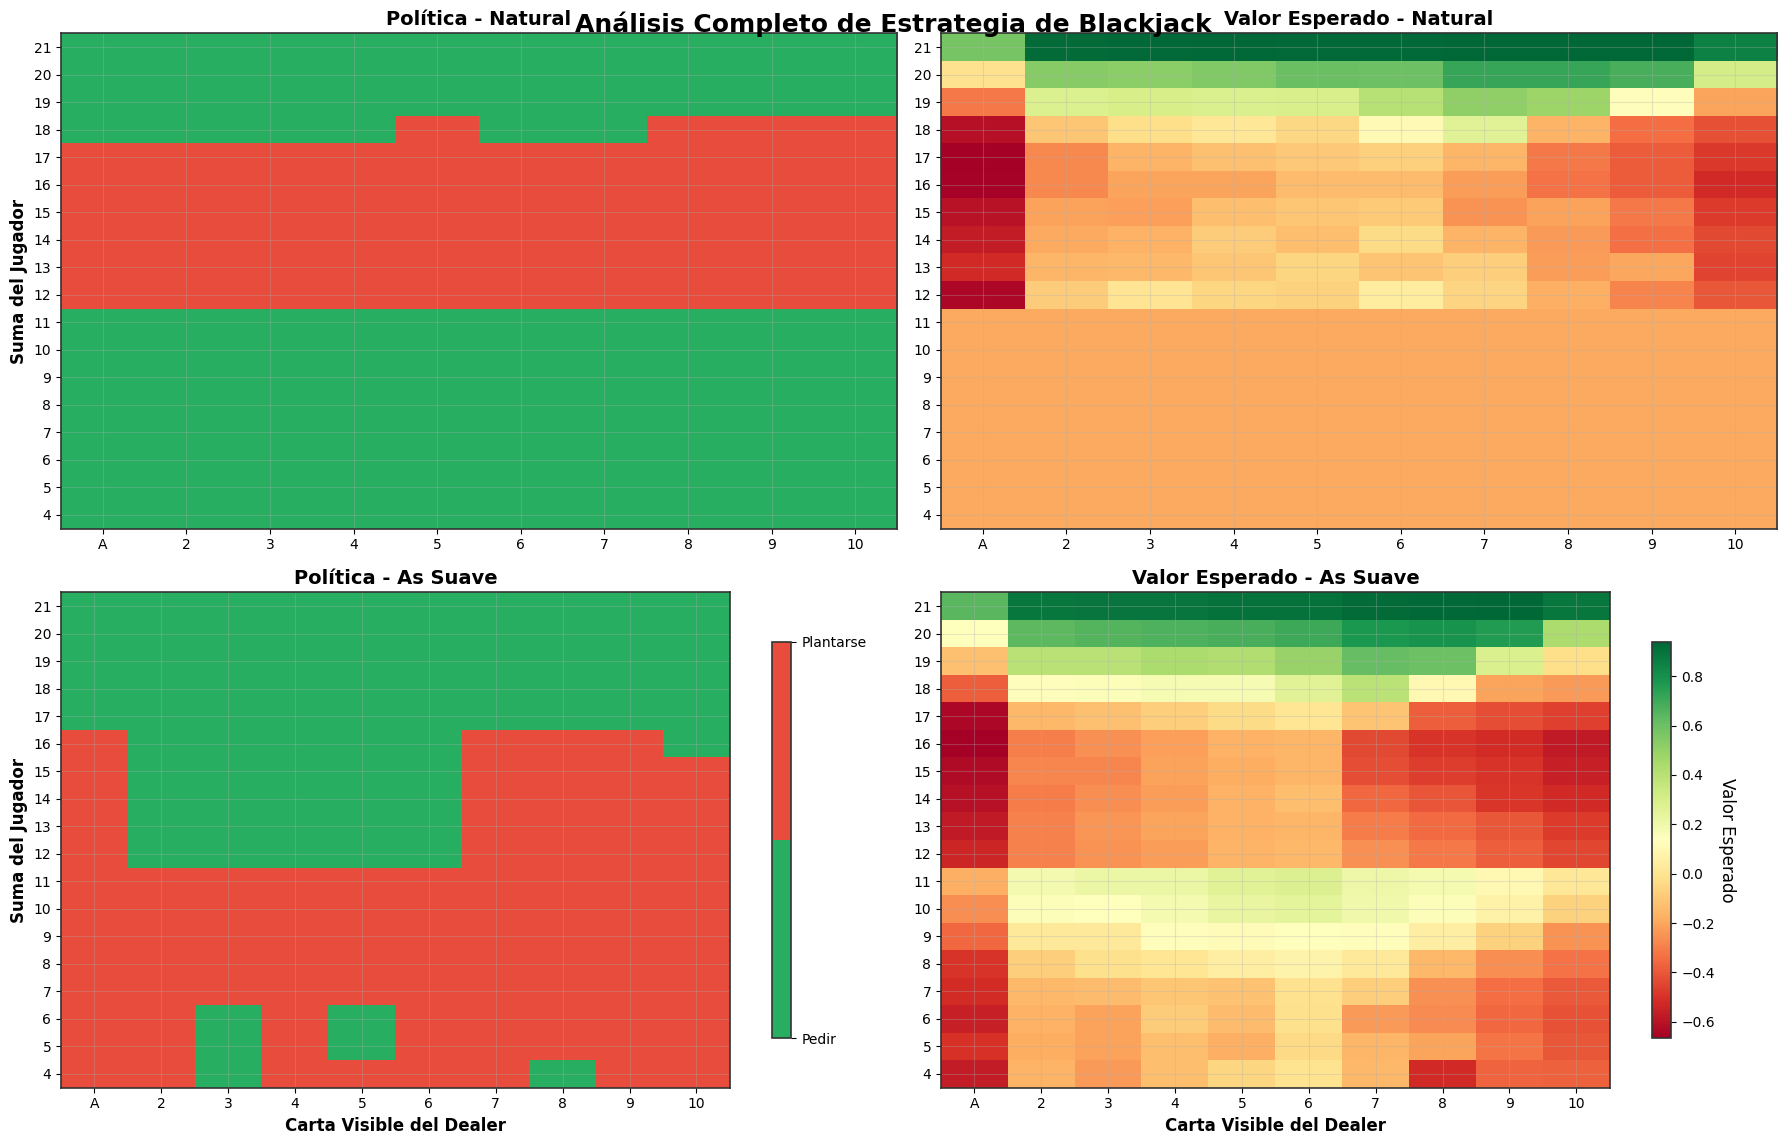

In [16]:

fig1, axes1 = plot_policy_and_value(Q, policy, usable_ace=True)
fig2, axes2 = plot_policy_and_value(Q, policy, usable_ace=False)

# Visualizar comparación completa
fig3, axes3 = plot_combined_analysis(Q, policy)

print("Funciones de visualización creadas:")
print("1. plot_policy_and_value() - Para visualizar individual")
print("2. plot_combined_analysis() - Para comparación completa")
print("3. configure_matplotlib() - Para configurar estilo")

In [23]:
import gym
import matplotlib.pyplot as plt
from collections import defaultdict

def simulate_policy(policy, n_episodes=10000):
    env = gym.make('Blackjack-v1', sab=True)
    
    wins = 0
    losses = 0
    hand_results = defaultdict(lambda: {"wins": 0, "losses": 0})

    for _ in range(n_episodes):
        state, _ = env.reset()
        done = False
        initial_state = state  # Para registrar la mano inicial
        
        while not done:
            action = policy.get(state, 0)  # 0=stick, 1=hit por defecto
            state, reward, done, _, _ = env.step(action)
        
        # Contar victorias y pérdidas
        if reward > 0:
            if reward == 1.5:  # Blackjack natural
                wins += 3
            else:
                wins += 2
            hand_results[initial_state]["wins"] += 1
        elif reward < 0:
            losses += 1
            hand_results[initial_state]["losses"] += 1

    # Preparar datos para graficar
    win_ratios = {hand: data["wins"] for hand, data in hand_results.items()}
    loss_ratios = {hand: data["losses"] for hand, data in hand_results.items()}

    # Top 5 ganadas
    top_wins = sorted(win_ratios.items(), key=lambda x: x[1], reverse=True)[:5]
    # Top 5 perdidas
    top_losses = sorted(loss_ratios.items(), key=lambda x: x[1], reverse=True)[:5]

    # Graficar
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Gráfico de más ganadas
    axes[0].bar([str(h) for h, _ in top_wins], [w for _, w in top_wins], color='green')
    axes[0].set_title("Top 5 Manos Más Ganadas")
    axes[0].set_ylabel("Victorias")
    axes[0].set_xlabel("Mano Inicial (Jugador, As usable, Carta Dealer)")

    # Gráfico de más perdidas
    axes[1].bar([str(h) for h, _ in top_losses], [l for _, l in top_losses], color='red')
    axes[1].set_title("Top 5 Manos Más Perdidas")
    axes[1].set_ylabel("Derrotas")
    axes[1].set_xlabel("Mano Inicial (Jugador, As usable, Carta Dealer)")

    plt.tight_layout()
    plt.show()

    return wins, losses


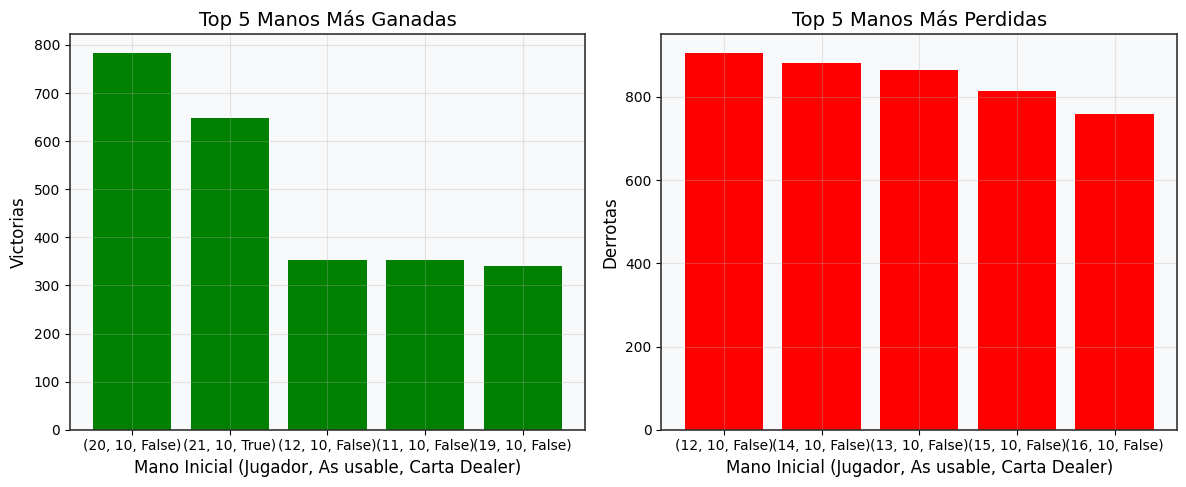

Victorias totales: 43426
Derrotas totales: 23902


In [26]:
# policy debería ser un diccionario {(player_sum, usable_ace, dealer_card): acción}
wins, losses = simulate_policy(policy, n_episodes=50000)
print(f"Victorias totales: {wins}")
print(f"Derrotas totales: {losses}")
